# 2 - Data Extraction - Natality Data

In this notebook we'll extract how many brazilians were born and registered 2015-present, by month and state. 

This dataset isn't available via API, so we'll need to scrape the Civil Registry Data Transparency Portal information webpage on birth registrations (https://transparencia.registrocivil.org.br/registros)

In [21]:
import datetime as dt
import pandas as pd
from matplotlib import rcParams, rcParamsDefault, pyplot as plt
import seaborn as sns

rcParams.update(rcParamsDefault)
rcParams['figure.figsize'] = (14, 8)
rcParams['figure.dpi'] = 100

sns.set_theme('poster')

Scraper is implemented in `playwright`. Due to issues with Jupyter and `asyncio`, it's implemented in `extract_civilregistry.py`, which must be executed separately.

This script exports a `.parquet` dataframe to the `data/processed` folder, which can be opened with `pandas`

In [2]:
filename = r'../data/processed/brazil_natality_state_monthly.parquet'

df = pd.read_parquet(filename)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2619 entries, 0 to 26
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   month              2619 non-null   datetime64[ns]
 1   state              2619 non-null   category      
 2   registered_births  2619 non-null   int32         
dtypes: category(1), datetime64[ns](1), int32(1)
memory usage: 55.0 KB


In [3]:
df.head(10)

,month,state,registered_births
0,2023-01-01,Acre,840
1,2023-01-01,Alagoas,2378
2,2023-01-01,Amapá,1070
3,2023-01-01,Amazonas,4226
4,2023-01-01,Bahia,9097
5,2023-01-01,Ceará,6725
6,2023-01-01,Distrito Federal,2557
7,2023-01-01,Espírito Santo,3046
8,2023-01-01,Goiás,4769
9,2023-01-01,Maranhão,5734


In [4]:
df['year'] = df['month'].dt.year

In [5]:
df['month_name'] = df['month'].dt.strftime("%b")
months_cat = pd.CategoricalDtype(
    categories = ('Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'),
    ordered = True
)

df['month_name'] = df['month_name'].astype(months_cat)

c:\ProgramData\Anaconda3\envs\covidjab_natality\lib\site-packages\seaborn\_oldcore.py:1134: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_data.insert(0, var, comp_col)


ValueError: cannot reindex on an axis with duplicate labels

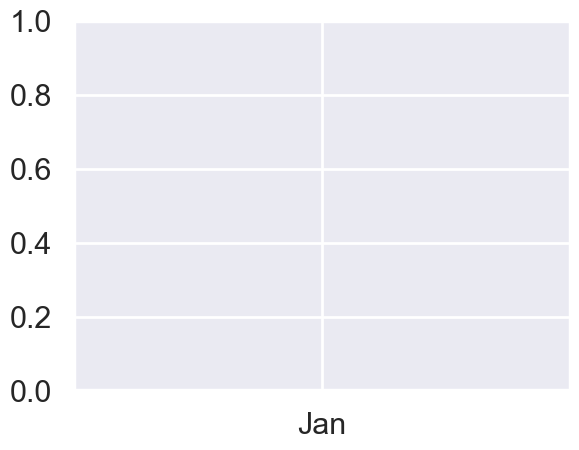

In [6]:
sns.lineplot(
    data = df,
    x = 'month_name', y = 'registered_births'
)

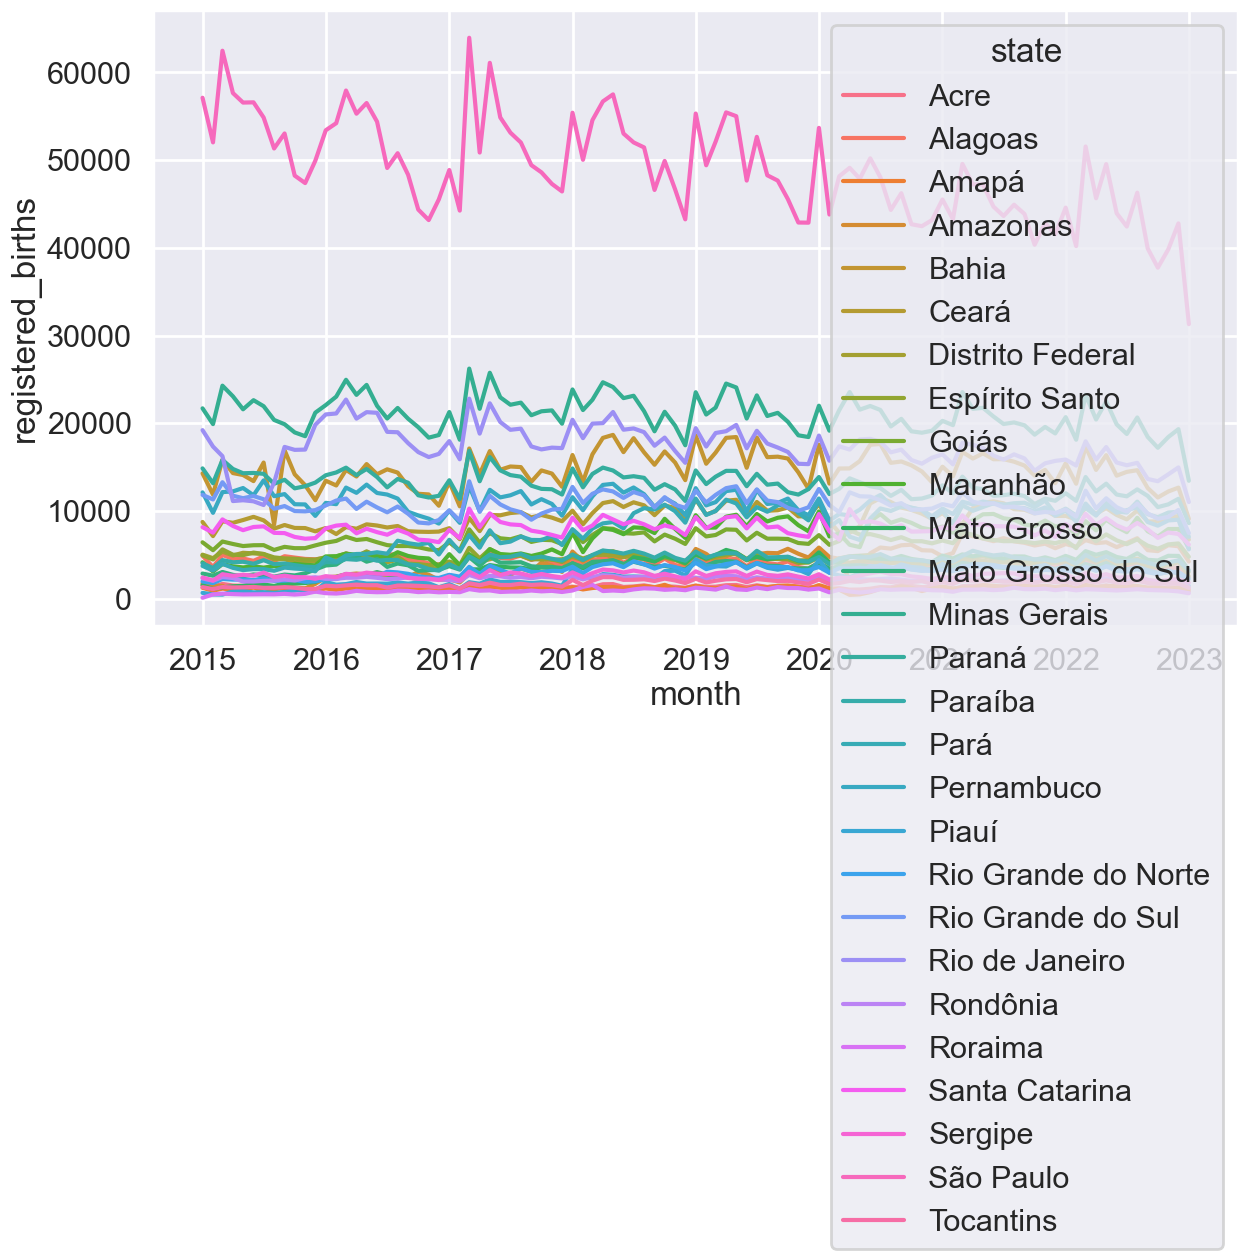

In [22]:
sns.lineplot(
    data = df,
    x = 'month', y = 'registered_births',
)
plt.show()